# Business Case:-
- Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

# Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

- Task 3:- Compare between various models and find the classifier that works better.


# Use case of HandwritingDigits Recognition :-
- Post Services: 
    - We can use handwriting recognition to identify and sort postal codes based on there digits. It will speed up the process.
- Banking and Finance:
    - We can we Handwriting recognition to to read Handwritten checks. Here we will check amounts,account numbers, and other          information on checks to automate the check processing.
- Number plate Recognition:
    - We can recognize the number plate by the last 4 digits it might be helpful for Law Enforcements.

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

tf.get_logger().setLevel('ERROR')

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape # 60000 training samples

(60000, 28, 28)

In [8]:
X_train[0] # 2-d array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

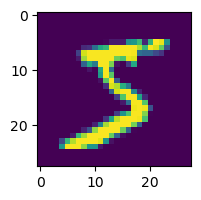

In [9]:
plt.figure(figsize=(15,2)) # Just checking the image
plt.imshow(X_train[0])

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
names = ("Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine")

In [12]:
names[5]

'Five'

In [13]:
def image(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(names[y[index]])

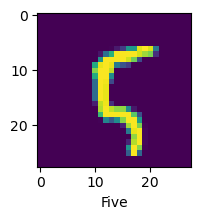

In [14]:
image(X_train,y_train,100) 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from keras import regularizers
from tensorflow.keras import layers,models

import numpy as np

from sklearn.metrics import accuracy_score,classification_report

### Model Creation

#### 1. KNeighborsClassifier model

In [16]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) # Coverting it into 2d
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [17]:
X_train_flat.shape

(60000, 784)

In [18]:
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
knn.fit(X_train_flat,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [19]:
y_pred_knn = knn.predict(X_test_flat)
print(f" Accuracy : {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test,y_pred_knn))

 Accuracy : 0.9665
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### 2. SVC model

In [20]:
X_train_scaled = StandardScaler().fit_transform(X_train_flat)
X_test_scaled = StandardScaler().fit_transform(X_test_flat)

svc = SVC(kernel='linear',verbose=1)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred_svc))

#### 3. ANN model

In [21]:
# Converting the data in the range of 0 to 1
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train_shaped = np.reshape(X_train, (-1, 28, 28, 1))
X_test_shaped = np.reshape(X_test, (-1, 28, 28, 1))

In [23]:
# Initialize Ann
model = Sequential()

In [24]:
model.add(Flatten(input_shape=(28,28,1))) # Input Layer
model.add(Dense(units=128,activation=PReLU()))# 1st Hidden Layer
model.add(Dense(units=64,activation=PReLU())) #  2nd hidden Layer
model.add(Dense(units=10,activation='softmax')) # Output layer

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model.fit(X_train_shaped,y_train,validation_split=0.33,epochs=2)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8595 - loss: 0.4931 - val_accuracy: 0.9450 - val_loss: 0.1817
Epoch 2/2
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9636 - loss: 0.1218 - val_accuracy: 0.9650 - val_loss: 0.1164


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,736 (1.25 MB)

 Trainable params: 109,578 (428.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 219,158 (856.09 KB)

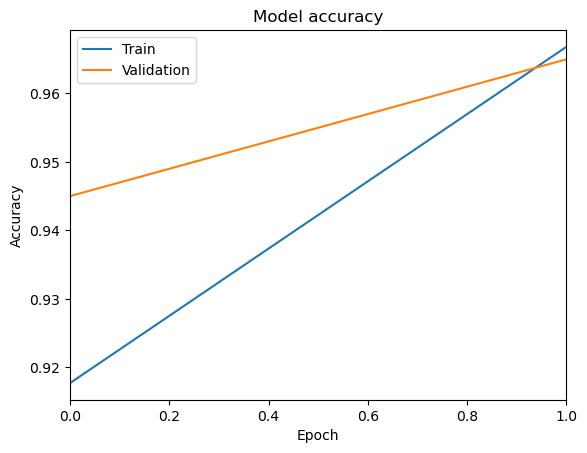

In [26]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim((0,1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
y_ann = model.predict(X_test_shaped)
y_pred_ann = np.argmax(y_ann, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
print(f" Accuracy : {accuracy_score(y_test, y_pred_ann)}")
print(classification_report(y_test,y_pred_ann))

 Accuracy : 0.9682
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.96      0.97       892
           6       0.96      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### 4. CNN model

In [29]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2, 2),padding="same"))
cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2),padding="same"))
cnn.add(layers.Conv2D(64,(3,3),activation='relu'))

cnn.add(Flatten()) 
cnn.add(Dense(64,activation="relu"))
cnn.add(Dense(10,activation='softmax')) # Output layer

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

history = cnn.fit(X_train_shaped,y_train,validation_split=0.25,epochs=2)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8841 - loss: 0.3666 - val_accuracy: 0.9749 - val_loss: 0.0793
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9839 - loss: 0.0525 - val_accuracy: 0.9814 - val_loss: 0.0607


In [30]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,984 (1.40 MB)

 Trainable params: 121,994 (476.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,990 (953.09 KB)

In [31]:
y_cnn = cnn.predict(X_test_shaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [32]:
y_test.shape

(10000,)

In [33]:
y_pred_cnn = np.argmax(y_cnn,axis=1)

In [34]:
print(f" Accuracy : {accuracy_score(y_test, y_pred_cnn)}")
print(classification_report(y_test,y_pred_cnn))

 Accuracy : 0.9845
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



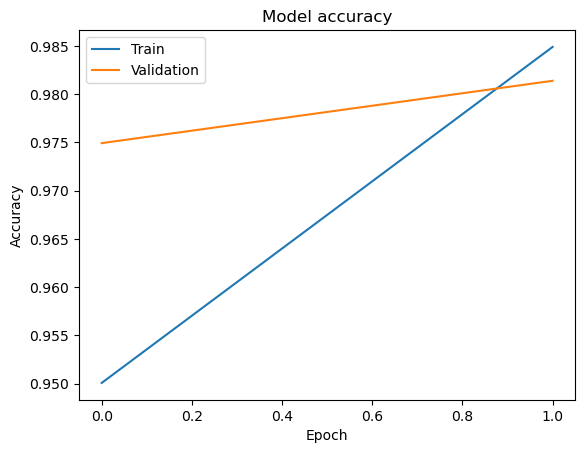

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Also, we have taken 2 Epoch for ANN and CNN because as we are increasing the number of Epoch the difference between "Accuracy" and "Val-Accuracy" is also increasing. Here, we have to minimize the difference between them, Epoch "2" was the point where difference starts increasing.

## Model comparision

- SVC is giving the lowest accuracy of 92%.
- CNN is giving the best accuracy of 98% and ANN, KNN is giving 96% accuracy which is slightly lesser than CNN.

#### As Cnn is giving best accuracy but the model is little overfitted. So, we will try cross validation to see of it performs same in each fold or not. 

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier

In [41]:
num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = []

for train_index, val_index in skf.split(X_train_shaped, y_train):
    
    X_train_fold, X_val_fold = X_train_shaped[train_index], X_train_shaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = models.clone_model(cnn) # Clone of above cnn model for each fold
    model.set_weights(cnn.get_weights())  # Copy weights from the original model

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy']) 

    model.fit(X_train_fold, y_train_fold, epochs=2, batch_size=32, verbose=1) # Training

    y_val_pred = model.predict(X_val_fold) # Predicting
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)

    accuracy = accuracy_score(y_val_fold, y_val_pred_classes)
    cv_scores.append(accuracy)
    
    print(f"Fold accuracy: {accuracy}")

cv_scores_str = ", ".join([f"{score:.4f}" for score in cv_scores])
print("Cross-Validation Accuracy Scores:", cv_scores_str)
print("Mean Accuracy:", np.mean(cv_scores))

Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9868 - loss: 0.0401
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9922 - loss: 0.0248
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Fold accuracy: 0.9915
Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9874 - loss: 0.0418
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9919 - loss: 0.0251
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Fold accuracy: 0.9870833333333333
Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9865 - loss: 0.0434
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9921 - loss: 0.0252
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Fold accuracy: 0.9884166666666667
Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9873 - loss: 0.0414
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9910 - loss: 0.0287
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Fold accuracy: 0.99125
Epoch 1/2
1

 After doing cross validation on CNN we can clearly the mean of the accuracy is around 98% which is great.

### So ,we will be selecting CNN as our generalized model.

-------

# Report on Challenges faced

- As this was our first Deep learning project it took more time to understand the models on how it will work in images.
- Also, when we were creating the SVC and KNN model at that time we don't know how to train the model on this kind of data but eventually we were able to figure that out as well.


# Application of HandwritingDigits Recognition

- Education and Assessments:
    - Grading handwritten exams, assessments, assignments, and answer sheets in educational institutions to automate grading         processes, provide instant feedback to students, and save time for educators.
- Data Entry and Form Processing:
    - Extracting and digitizing handwritten numeric data from forms, surveys, applications, and questionnaires for efficient           data entry, analysis, reporting, and decision-making in various industries.

-------

# Conclusion

- In conclusion, developing a successful Handwriting Recognition model will automate most of the work which will reduce manual effort, cost, minimizes error and increases efficiency, making it a valuable technology across different industries and applications.